# <ins>Analysis on the Potential of Life on Exoplanets</ins>

## By: Ethan Barr and Tim Freerksen

## <ins>Introduction</ins>

Is there life in space? This has been a question for many years with no real evidence to back up the claim that there is. Our goal in this project is to take the exoplanets already discovered and see what the probability of life on these planets real is and hope that a good amount of the exoplanets that we discovered so far fit well into the criteria of haveing the ability to hold life.

Throughout this tutorial, we will try to see how many of the exoplanets we have discovered so far the right conditions in order to harbor life and then we will see what the probability is that a future exoplanet will end up holding life.

### <ins>Required Tools</ins>

The following libraries used for the project:

    1. pandas
    2. regex
    3. numpy
    4. matplotlib

If having issues with python 3+ or panda, we recommend referring to these following websites for more information:

    1. https://docs.python.org/3/
    2. https://pandas.pydata.org/pandas-docs/stable/install.html

### <ins>1. Data Collection</ins>

This is the first part of the data life cycle. In this part we will go through various websites to try and find data that both matches our topic at hand as well as gives enough information so that we can perform an analysis later on. 

For an Exoplanet Database we found that https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS gave the best and most information from 1989 - 2020. In order to retrieve this data we first converted the online database into a csv file in which we could then read and manipulate.

The following tools were used for the data collection:

    1. panda

In [48]:
import pandas as pd                     # used in order to read the csv file and convert it successfully into a datafram
import re                               # used to easily gather columns of similar aspects
import numpy as np                      # used in order to calculate the abosolute value of a number and other mathematical operations
import matplotlib.pyplot as plot        # allows for the visualization of data

Since the exoplanetarchive website was nice enough to allow the downloading of the database into a csv file, there was not a lot of steps to fully access the entire database. It was sufficient to first download the database in a csv format and then add it as one of the files with this project. We could then easily access this file by performing a pandas read_csv which allowed for the entire csv file to be converted into a flexibile and readable DataFrame that we could use.

A <ins>DataFrame</ins> is a table that has rows and columns that correlate to certain pieces of data. Using DataFrames allows for better use of more pandas functions which help to manipulate this data much more flexibily. If interested in learning more about DataFrames then check out the pandas documentation of it at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

The only issue that the csv had when we first read it was that the data provided had its only numbering associated with each row. To combact this we decided to stick with how the original data numbered itself and assigned that row to be the row number titled, loc_rowid.



In [49]:
data = pd.read_csv('PS.csv')
data.set_index('loc_rowid', inplace=True)
data.head()

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,soltype,pl_controv_flag,...,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2,rowupdate,pl_pubdate,releasedate
loc_rowid,,,,,,,,,,,,,,,,,,,,,
1,11 Com b,11 Com,0,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-07-23,2011-08,2014-07-23
2,11 Com b,11 Com,1,2,1,Radial Velocity,2007,Xinglong Station,Published Confirmed,0,...,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848,2014-05-14,2008-01,2014-05-14
3,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25 14:08:01,2009-10,2014-05-14
4,11 UMi b,11 UMi,0,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-04-25 14:08:01,2011-08,2014-07-23
5,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Published Confirmed,0,...,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903,2018-09-04 16:14:36,2017-03,2018-09-06


### <ins>2. Data Processing</ins>

After you successfully retrieve the data that you are looking for and have it in some sort of dataframe so that you can manipulate it then you move onto this next step. Within this step we want to try and tidy up the data that we just read in. This is an important step because of the fact that it will allow the data to be read and understood with much more fluidity. In our case we would be altering the structure of the DataFrame through the process of tidying data and / or data wrangling.

You can learn more about:

    1. tidying data: https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
    2. data wrangling: https://www.elderresearch.com/blog/what-is-data-wrangling-and-why-does-it-take-so-long/#:~:text=Data%20wrangling%20is%20the%20process,20%25%20for%20exploration%20and%20modeling.

We will now go through the steps of tiding up our DataFrame so that any extra columns are discarded since we will not need them to perform our analysis. We also want to add a few columns to the DataFrame so that when we perform some calculations we can easily convert the column values out of their comparison units (example: 10 Earth Masses, which is just saying that the planet is 10 time the size of Earth). Another issue that we have with this DataFrame is that the names, due to there being many columns, may not be very intuitive, so in order to be able to understand the column values quicker without a cheat sheet of what each column represents we want to change the column names.

Due to space being such a hard thing to measure as we can't just take out a ruler and measure it that way, astronomers typically write down what they believe a value is and then the upper and lower limits of what that value could be. We will be just taking into account what they believe the specific value to be and ignore the upper and lower limits in order to help calculate certian aspects of the exoplanets and host stars much easier.

The following tools were used for Data Processing:

    1. regex
    2. numpy

In [50]:
# This Loop is systematically removing the Upper and Lower limit values as well as the Limit Flags attactched to certain
# values
for columnName, columnData in data.iteritems():
    if (re.search('[1|2]', columnName)):
        data.drop(columnName, axis=1, inplace=True)
    elif (re.search('lim', columnName)):
        data.drop(columnName, axis=1, inplace=True)

# Removing the columns that are not needed but were not captured by the previous for loop
data.drop('default_flag', axis=1, inplace=True)
data.drop('discoverymethod', axis=1, inplace=True)
data.drop('disc_facility', axis=1, inplace=True)
data.drop('soltype', axis=1, inplace=True)
data.drop('pl_controv_flag', axis=1, inplace=True)
data.drop('pl_refname', axis=1, inplace=True)
data.drop('ttv_flag', axis=1, inplace=True)
data.drop('rowupdate', axis=1, inplace=True)
data.drop('pl_pubdate', axis=1, inplace=True)
data.drop('releasedate', axis=1, inplace=True)
data.drop('sy_refname', axis=1, inplace=True)
data.drop('rastr', axis=1, inplace=True)
data.drop('ra', axis=1, inplace=True)
data.drop('decstr', axis=1, inplace=True)
data.drop('dec', axis=1, inplace=True)
data.drop('sy_gaiamag', axis=1, inplace=True)
data.drop('sy_kmag', axis=1, inplace=True)
data.drop('sy_vmag', axis=1, inplace=True)
data.drop('st_refname', axis=1, inplace=True)
data.drop('pl_orbeccen', axis=1, inplace=True)
data.drop('pl_insol', axis=1, inplace=True)
data.drop('sy_snum', axis=1, inplace=True)
data.drop('sy_pnum', axis=1, inplace=True)

data.head()


,pl_name,hostname,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_eqt,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_dist
loc_rowid,,,,,,,,,,,,,,,,,,
1,11 Com b,11 Com,2007,NaN,1.21,NaN,NaN,5434.7000,17.10,Msini,NaN,NaN,NaN,2.60,NaN,NaN,NaN,93.1846
2,11 Com b,11 Com,2007,326.03000,1.29,NaN,NaN,6165.6000,19.40,Msini,NaN,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,93.1846
3,11 UMi b,11 UMi,2009,516.22000,1.54,NaN,NaN,3337.0700,10.50,Msini,NaN,4340.0,24.08,1.80,0.04,[Fe/H],1.60,125.3210
4,11 UMi b,11 UMi,2009,NaN,1.51,NaN,NaN,3432.4000,10.80,Msini,NaN,NaN,NaN,1.70,NaN,NaN,NaN,125.3210
5,11 UMi b,11 UMi,2009,516.21997,1.53,NaN,NaN,4684.8142,14.74,Msini,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,125.3210


After removing the columns that aren't useful or won't be necessary for our calculations we can do the next step of tidying up our data. This would be to remove the rows that have missing data. Now we don't have to delete every row that is missing data because some columns can be interchangable. An example of an interchangable column is the radius and mass of the planet nut in the units of Earth Radius/Mass or Jupiter Radius/Mass which we can use either value in a formula since in the end we can just convert this value to any radius/mass units that we need. We also want to keep as many columns as we can so that we can get a better analysis.

To get more information regarding the data that we are using, check out this website:

    1. http://exoplanetarchive.ipac.caltech.edu

In [51]:
for index, row in data.iterrows():
    if (
          ((str(data.at[index, 'pl_rade']) == 'nan') & (str(data.at[index, 'pl_radj']) == 'nan'))                   # This is checking to make sure that at least one of the values for radius was recorded for the planet
        | ((str(data.at[index, 'pl_bmasse']) == 'nan') & (str(data.at[index, 'pl_bmassj']) == 'nan'))               # This is checking to make sure that at least one of the values for the mass of the planet was recorded
        | (str(data.at[index, 'st_teff']) == 'nan')                                                                 # This is making sure that we know what the Stellar Effective Temperature is for the host star
        | (str(data.at[index, 'st_rad']) == 'nan')                                                                  # This is the recording for the host stars radius
        | (str(data.at[index, 'st_mass']) == 'nan')                                                                 # This is the recorded mass for the hist star
     ):
        data.drop(index, inplace=True)

data.head()

,pl_name,hostname,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_eqt,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_dist
loc_rowid,,,,,,,,,,,,,,,,,,
23,1RXS J160929.1-210524 b,1RXS J160929.1-210524,2008,NaN,330.00000,18.647,1.664,2543.000,8.00000,Mass,1800.0,4060.0,1.35,0.85,NaN,NaN,NaN,139.1350
31,2MASS J02192210-3925225 b,2MASS J02192210-3925225,2015,NaN,156.00000,16.141,1.440,4417.837,13.90000,Mass,NaN,3064.0,0.28,0.11,NaN,NaN,4.59,NaN
36,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,2009,7336.500000,NaN,10.310,0.920,6657.480,20.95000,Mass,2075.0,2300.0,0.12,0.08,NaN,NaN,NaN,NaN
82,55 Cnc e,55 Cnc,2004,0.736539,0.01544,1.910,0.170,8.080,0.02542,Mass,NaN,5250.0,0.96,0.90,0.35,[M/H],4.42,12.5855
83,55 Cnc e,55 Cnc,2004,0.736546,0.01583,2.173,0.194,8.370,0.02600,Mass,NaN,5250.0,0.96,0.90,0.35,[M/H],4.42,12.5855


Now that we have cleaned most of the DataFrame up we can see that the rowid values for each row is not counting nicely, so we should not reset the index values by using an easy pandas function called .reset_index. This function will then move loc_rowid into its own column replacing its functionality. We can then say that the loc_rowid lost its reason for being in the column so to clean the DataFrame up more we can just remove it altogether

In [52]:
data.reset_index(inplace=True, drop=True)
data.head()

,pl_name,hostname,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_eqt,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_dist
0,1RXS J160929.1-210524 b,1RXS J160929.1-210524,2008,NaN,330.00000,18.647,1.664,2543.000,8.00000,Mass,1800.0,4060.0,1.35,0.85,NaN,NaN,NaN,139.1350
1,2MASS J02192210-3925225 b,2MASS J02192210-3925225,2015,NaN,156.00000,16.141,1.440,4417.837,13.90000,Mass,NaN,3064.0,0.28,0.11,NaN,NaN,4.59,NaN
2,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,2009,7336.500000,NaN,10.310,0.920,6657.480,20.95000,Mass,2075.0,2300.0,0.12,0.08,NaN,NaN,NaN,NaN
3,55 Cnc e,55 Cnc,2004,0.736539,0.01544,1.910,0.170,8.080,0.02542,Mass,NaN,5250.0,0.96,0.90,0.35,[M/H],4.42,12.5855
4,55 Cnc e,55 Cnc,2004,0.736546,0.01583,2.173,0.194,8.370,0.02600,Mass,NaN,5250.0,0.96,0.90,0.35,[M/H],4.42,12.5855


Great! Now all our rows are perfectly numbered again and we only have the columns that we would need for us to perform an analysis. The next step that we will perform is to convert all the columns where the units are in Earth Radius, Earth Mass, Jupiter Radius, and Jupiter Mass and convert them into a more usable unit of measure that we can use in the calculations that we will do later. With that said we want to convert these units into kilometer (km) and kilograms (kg) as these are typically the units for astronomy calculations.

If you would like to learn more about the Astronomical System of Units then we recommend this website for a read:

    1. https://en.wikipedia.org/wiki/Astronomical_system_of_units

Now that we know what we are going to do we need to figure out how we are going to accomplish this. Based on a quick search we know:
    
    Earth Mass = 5.972 * 10 ^ 24 kg 
    Earth Radius = 6,371 km

    Jupiter Mass = 1.898 * 10 ^ 27 kg
    Jupiter Radius = 69,911 km
    
    Solar Mass = 1.989 * 10 ^30 kg
    Solar Radius = 6.9 * 10 ^ 5 km

With this information we can then go through the columns and just multiply them by these values in order to get the mass of the planet in kilograms and the radius of the planet in kilometers

Before we convert all the masses and radii to SI units (kilograms and kilometers), we want to check to see which exoplanets are most similar to either Earth or Jupiter in terms of both mass and radius (this will be used in a later section of the project). 

A <ins>Super Earth</ins> is classified as a planet that is between twice the size of Earth and up to 10 times the mass of Earth (for our classification we decided to slightly increase this range so that we could capture exoplanets that were slightly larger than a Super Planet but still had the right ratio to be consider Earth Like). This means that in order to determine whether a planet is more similar to Earth or Jupiter we much check both the mass and radius that is recorded and see whether the exoplanet would be considered in the range of the classification of a Super Earth before we check whether it is more similar to Jupiter.

To learn more about what Super Earths are, check out this website:

    1. https://exoplanets.nasa.gov/what-is-an-exoplanet/planet-types/super-earth/

In the code segment below, we will look at columns of the data related to the planet's mass and radius in Earth and Jupiter mass/radii and if the values are within the range of what a Super Earth is then we will classify the exoplanet to be similar to Earth however if it does not then we will check to see which planet (Earth or Jupiter) it is more similar to. If the value of the either column is "nan" (null) then we will assume that the exoplanet is most similar to the non-null value.

In [53]:
def closerToOne(eMass, eRad, jMass, jRad):
    
    if ((eMass <= 15) & (eRad <= 7)):
        return 'Earth'
    else:
        return 'Jupiter'
    
data["Similar to"] = "Earth"
for i, row in data.iterrows():
    
    if ((data.at[i, 'pl_bmasse'] == "nan") | (data.at[i, 'pl_rade'] == "nan")):
        data.at[i, 'Similar to'] = "Jupiter"
        
    elif ((data.at[i, 'pl_bmassj'] == "nan") | (data.at[i, 'pl_radj'] == 'nan')):
        data.at[i,"Similar to"] = "Earth"
        
    else:
        eMass = data.at[i, 'pl_bmasse']
        eRad = data.at[i, 'pl_rade']
        jMass = data.at[i, 'pl_bmassj']
        jRad = data.at[i, 'pl_radj']
        
        data.at[i, "Similar to"] = closerToOne(eMass, eRad, jMass, jRad)
    
data.head()



,pl_name,hostname,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_eqt,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_dist,Similar to
0,1RXS J160929.1-210524 b,1RXS J160929.1-210524,2008,NaN,330.00000,18.647,1.664,2543.000,8.00000,Mass,1800.0,4060.0,1.35,0.85,NaN,NaN,NaN,139.1350,Jupiter
1,2MASS J02192210-3925225 b,2MASS J02192210-3925225,2015,NaN,156.00000,16.141,1.440,4417.837,13.90000,Mass,NaN,3064.0,0.28,0.11,NaN,NaN,4.59,NaN,Jupiter
2,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,2009,7336.500000,NaN,10.310,0.920,6657.480,20.95000,Mass,2075.0,2300.0,0.12,0.08,NaN,NaN,NaN,NaN,Jupiter
3,55 Cnc e,55 Cnc,2004,0.736539,0.01544,1.910,0.170,8.080,0.02542,Mass,NaN,5250.0,0.96,0.90,0.35,[M/H],4.42,12.5855,Earth
4,55 Cnc e,55 Cnc,2004,0.736546,0.01583,2.173,0.194,8.370,0.02600,Mass,NaN,5250.0,0.96,0.90,0.35,[M/H],4.42,12.5855,Earth


In [54]:
eMass = 5.972 * (10**24)
eRad = 6371
jMass = 1.898 * (10**27)
jRad = 69911
sMass = 1.989 * (10**30)
sRad = 6.9 * (10**5)
#Iterate over rows and convert Earth, Jupiter, and Solar masses and radii to SI units of kilograms and kilometers
for i, row in data.iterrows():
    
    if (data.at[i, "pl_bmasse"] != 'nan'):
        
        data.at[i, 'pl_bmasse'] = data.at[i, 'pl_bmasse'] * eMass
    
    if (data.at[i, "pl_rade"] != 'nan'):
        
        data.at[i, 'pl_rade'] = data.at[i, 'pl_rade'] * eRad
        
    if (data.at[i, "pl_bmassj"] != 'nan'):
        
        data.at[i, 'pl_bmassj'] = data.at[i, 'pl_bmassj'] * jMass
        
    if (data.at[i, "pl_radj"] != 'nan'):
        
        data.at[i, 'pl_radj'] = data.at[i, 'pl_radj'] * jRad
        
    if (data.at[i, "st_mass"] != 'nan'):
        
        data.at[i, 'st_mass'] = data.at[i, 'st_mass'] * sMass
    
    if (data.at[i, "st_rad"] != 'nan'):
        
        data.at[i, 'st_rad'] = data.at[i, 'st_rad'] * sRad
        


data.head()

,pl_name,hostname,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_eqt,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_dist,Similar to
0,1RXS J160929.1-210524 b,1RXS J160929.1-210524,2008,NaN,330.00000,118800.037,116331.904,1.518680e+28,1.518400e+28,Mass,1800.0,4060.0,931500.0,1.690650e+30,NaN,NaN,NaN,139.1350,Jupiter
1,2MASS J02192210-3925225 b,2MASS J02192210-3925225,2015,NaN,156.00000,102834.311,100671.840,2.638332e+28,2.638220e+28,Mass,NaN,3064.0,193200.0,2.187900e+29,NaN,NaN,4.59,NaN,Jupiter
2,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,2009,7336.500000,NaN,65685.010,64318.120,3.975847e+28,3.976310e+28,Mass,2075.0,2300.0,82800.0,1.591200e+29,NaN,NaN,NaN,NaN,Jupiter
3,55 Cnc e,55 Cnc,2004,0.736539,0.01544,12168.610,11884.870,4.825376e+25,4.824716e+25,Mass,NaN,5250.0,662400.0,1.790100e+30,0.35,[M/H],4.42,12.5855,Earth
4,55 Cnc e,55 Cnc,2004,0.736546,0.01583,13844.183,13562.734,4.998564e+25,4.934800e+25,Mass,NaN,5250.0,662400.0,1.790100e+30,0.35,[M/H],4.42,12.5855,Earth


Awesome now that we have the converted values of the columns we can now begin to calculate some numbers that would help us better determine if an exoplanet is a potentially habitable and possibly contain life.

The columns that we have left are:

    1. pl_name:           Planet Name
    2. hostname:          Host Name
    3. disc_year:         Discovery Year
    4. pl_orbper:         Orbital Period [days]
    5. pl_orbsmax:        Orbit Semi-Major Axis [AU] (distance for their host star)
    5. pl_rade:           Planet Radius converted from Earth Radius
    6. pl_radj:           Planet Radius converted from Jupiter Radius
    7. pl_bmasse:         Planet Mass converted from Earth Mass
    8. pl_bmassj:         Planet Mass converted from Jupiter Mass
    9. pl_bmassprov:      Planet Mass Provenance
    10. pl_eqt:           Equilibrium Temperature
    11. st_teff:          Stellar Effective Temperature
    12. st_mass:          Stellar Mass converted from Solar Mass
    13. st_rad:           Stellar Radius converted from Solar Radius
    14. st_met:           Stellar Metallicity [dex]
    15. st_metratio:      Stellar Metallicity Ratio
    16. st_logg:          Stellar Surface Gravity
    17. sy_dist:          Distance to the planetary system

### <ins>3. Exploratory Analysis and Data Visualization</ins>

After going through all the data and successfully tidying up the data so that we can perform an analysis, we come to this next step. Exploratory Analysis and Data Visualization, in this step we want to show some potential trends that show up in our data set as well as perform some statistical analyses in order to obtain a greater and deeper understanding of what type of trends there may be.

First we want to start by calculating where the frost line of the specific host stars may be. A <ins>Frost Line</ins> is known also known as the snow line or ice line and is boundary in a solar system in which it is cold enough for volatile compounds such as water, ammonia, methane, carbon dioxide, and carbon monoxide condense into a solid which unless an outside force is applied to the planet to keep it warm is not a good sign for life.

To learn more about Frost Line, we recommend to check out this website:

    1. https://en.wikipedia.org/wiki/Frost_line_(astrophysics)#:~:text=In%20astronomy%20or%20planetary%20science,condense%20into%20solid%20ice%20grains.

In order to caluclate the Frost Line we are going to use for formula :

\begin{equation*}
T(frost)^4 = \frac{R^2 * T^4}{4 * r(frost)^2}
\end{equation*}

Now that we have this equation the next step is to rework it in order to solve for r(frost) since this would show us where the frost line is located.

After a quick rework of the original formula and we get :

\begin{equation*}
r(frost) = \sqrt[2]{\frac{R^2 * T^4}{4 * T(frost)^4}}
\end{equation*}

Great! We have the equation we need to solve for the frost line. Now we need to figure out what each element means:

    1. R^2 and T^4 are both value correlating to the Host Star (Host Radius and Host Temperature)
    2. T(frost), this value will be set to 150 K, which represents the boundary between the Inner and Outer System (average between H2O (180 K) and NH3 (130 K))




In [55]:
data['frost_line'] = 'nan'

km_to_AU = 6.68 * (10**-9)
for index, row in data.iterrows():
    solar_radius = data.at[index, 'st_rad']
    solar_temperature = data.at[index, 'st_teff']
    t_frost = 150

    r_frost = np.power(((np.power(solar_radius, 2) * np.power(solar_temperature, 4)) / (4 * np.power(t_frost, 4))), (1/2))
    r_frost = r_frost * km_to_AU
    data.at[index, 'frost_line'] = r_frost

data.head()

,pl_name,hostname,disc_year,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_eqt,st_teff,st_rad,st_mass,st_met,st_metratio,st_logg,sy_dist,Similar to,frost_line
0,1RXS J160929.1-210524 b,1RXS J160929.1-210524,2008,NaN,330.00000,118800.037,116331.904,1.518680e+28,1.518400e+28,Mass,1800.0,4060.0,931500.0,1.690650e+30,NaN,NaN,NaN,139.1350,Jupiter,2.27929
1,2MASS J02192210-3925225 b,2MASS J02192210-3925225,2015,NaN,156.00000,102834.311,100671.840,2.638332e+28,2.638220e+28,Mass,NaN,3064.0,193200.0,2.187900e+29,NaN,NaN,4.59,NaN,Jupiter,0.269246
2,2MASS J21402931+1625183 A b,2MASS J21402931+1625183 A,2009,7336.500000,NaN,65685.010,64318.120,3.975847e+28,3.976310e+28,Mass,2075.0,2300.0,82800.0,1.591200e+29,NaN,NaN,NaN,NaN,Jupiter,0.0650204
3,55 Cnc e,55 Cnc,2004,0.736539,0.01544,12168.610,11884.870,4.825376e+25,4.824716e+25,Mass,NaN,5250.0,662400.0,1.790100e+30,0.35,[M/H],4.42,12.5855,Earth,2.71021
4,55 Cnc e,55 Cnc,2004,0.736546,0.01583,13844.183,13562.734,4.998564e+25,4.934800e+25,Mass,NaN,5250.0,662400.0,1.790100e+30,0.35,[M/H],4.42,12.5855,Earth,2.71021


Awesome! With the Frost line calculated we can now tell whether the planet will most likely be a terrestrial exoplanet or a gas/ice giant. This would get us a better understanding of which exoplanets could harbor life but before we are quick to judge we should see what the <ins>Effective Temperature</ins> is of the planets because even if it is beyond the frost line, if there is enough heat generated to have liquids contained on the exoplanet then it still has the possibility to harbor some type of life.

To read more about Effective Temperature, check out this website:

    1. https://en.wikipedia.org/wiki/Effective_temperature#:~:text=From%20Wikipedia%2C%20the%20free%20encyclopedia,total%20amount%20of%20electromagnetic%20radiation.

To give a good example about what a good Effective Temperature is: On Earth the Effective Temperature is 252 K and with Greenhouse Effect is 288 K, so we want a planet that is around these numbers to say that it has a good Effective Temperature.

To calculate the Effective Temperature you can use the formula:

\begin{equation*}
T(effective) = \sqrt[4]{\frac{(1 + gamma) * (1 - a)}{4} * \frac{R^2 * T^4}{r(orbit)^2}}
\end{equation*}

What does each variable represent?

    1. (1 + gamma) represents the light after being reflected by the planet, how much of that light is then reflected again towards the planet
    2. (1 - a) represents the amount of heat that is absorbed by the planet (a being the albedo or reflectiveness of a planet)
    3. R^2 and T^2, like before represent the radius and temperature of the Host star that the exoplanet revolves around
    4. The division by 4 comes from the fact that exoplanets absorb light like a disk but emit heat like a sphere

Unfortunately, we do not have what the 'gamma' and 'a' values of the exoplanets are however we do have a column called 'pl_eqt' which stands for Equilibrium Temperature. This is very similar to Effective Temperature however its a theoretical temperature that an exoplanet would be heated only based on their host star. 

To read more about this topic, visit this site:

    1. https://en.wikipedia.org/wiki/Planetary_equilibrium_temperature

Since we really want to see how many of the exoplanets we have that have a decent 'Effective Temperature' we will show a plot that is comparing what the steller effective temperature is to what the exoplanets Equilibrium Temperature is 

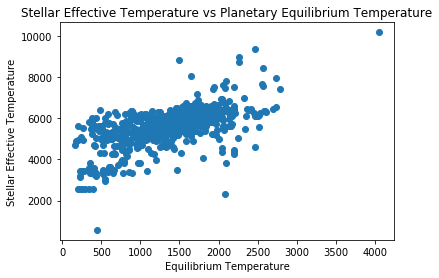

In [70]:
equilibrium_temp = []
stellar_temp = []

for index, row in data.iterrows():
    if ((data.at[index, 'pl_eqt'] != 'nan') & (data.at[index, 'st_teff'] != 'nan')):
        equilibrium_temp.append(data.at[index, 'pl_eqt'])
        stellar_temp.append(data.at[index, 'st_teff'])

plot.scatter(equilibrium_temp, stellar_temp)
plot.title('Stellar Effective Temperature vs Planetary Equilibrium Temperature')
plot.xlabel('Equilibrium Temperature')
plot.ylabel('Stellar Effective Temperature')
plot.show()



Habitable Zone of Solar System